In [7]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
def preproc(img, input_size, swap=(2, 0, 1)): 
    if len(img.shape) == 3:
        padded_img = np.ones((input_size[0], input_size[1], 3), dtype=np.uint8) * 114
    else:
        padded_img = np.ones(input_size, dtype=np.uint8) * 114

    r = min(input_size[0] / img.shape[0], input_size[1] / img.shape[1])
    resized_img = cv2.resize(
        img,
        (int(img.shape[1] * r), int(img.shape[0] * r)),
        interpolation=cv2.INTER_LINEAR,
    ).astype(np.uint8)
    padded_img[: int(img.shape[0] * r), : int(img.shape[1] * r)] = resized_img

    padded_img = padded_img.transpose(swap)
    padded_img = np.ascontiguousarray(padded_img, dtype=np.float32)
    return padded_img, r
    
def preproc_32scaled(img, input_size, swap=(2, 0, 1)):

        ori_w,ori_h = img.shape[1],img.shape[0]
        dst_w = max(32,min(input_size[1],math.ceil(img.shape[1]/32)*32))
        dst_h = max(32,min(input_size[0],math.ceil(img.shape[0]/32)*32))
        ratio_w = img.shape[1]/dst_w
        ratio_h = img.shape[0]/dst_h
        new_h = 0
        new_w = 0 
        if ratio_w > 1 or ratio_h > 1:
            # exit()
            if ratio_w > ratio_h:
                new_w = int(img.shape[1]/ratio_w)
                new_h = int(img.shape[0]/ratio_w)
            else:
                new_w = int(img.shape[1]/ratio_h)
                new_h = int(img.shape[0]/ratio_h)
            img = cv2.resize(img, (new_w,new_h),interpolation=cv2.INTER_LINEAR)
            img = cv2.copyMakeBorder(img, 0, input_size[0]-new_h, 0, input_size[1]-new_w, cv2.BORDER_CONSTANT, value=0).astype(np.uint8) #dyn
        else:
            new_w = img.shape[1]
            new_h = img.shape[0]
            img = cv2.copyMakeBorder(img, 0, input_size[0]-new_h, 0, input_size[1]-new_w, cv2.BORDER_CONSTANT, value=0).astype(np.uint8) #dyn
        
        ratio_w = new_w/ori_w
        ratio_h = new_h/ori_h
        # print("*"*100)
        # print(f'ori img shape: {ori_h} and {ori_w}')
        # print(f"new img size:{img.shape}")
        # print("*"*100)

        padded_img = img.transpose(swap)
        padded_img = np.ascontiguousarray(padded_img, dtype=np.float32)
        return padded_img, ratio_w ,ratio_h

        # polys = polys.astype(float)
        # polys[:,0::2] = np.round(polys[:,0::2]*w_scaled_ratio) #改变标注框w的值
        # polys[:,1::2] = np.round(polys[:,1::2]*h_scaled_ratio) #改变标注框h的值
        # polys = polys.astype(int)

In [26]:
img = cv2.imread('458@468.png')
img = cv2.imread('2560@1440.png')
img = cv2.imread('2k.png')
img1,r = preproc(img, (1280,1280),swap=(0,1,2))
img2,r_w,r_h = preproc_32scaled(img, (1280,1280),swap=(0,1,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


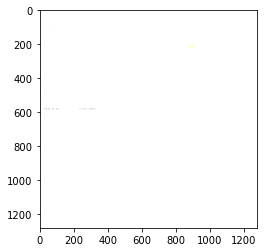

In [30]:
# cv2.imshow('tt',img)
plt.imshow(img1)
# fig ,ax = plt.subplots(nrows=2, ncols=2,figsize=[15, 10])
# ax[0][0].imshow(img)
# ax[1][0].imshow(img1)
# ax[1][1].imshow(img2)

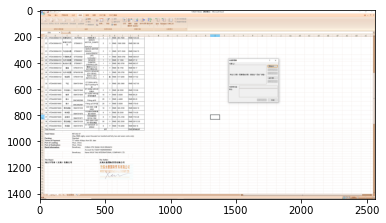

In [29]:
plt.imshow(img)